## Assignment 6
## Author :Raziq Ahmad Saudagar

#Task1

This assignment is for visualization using matplotlib: 
data to use: 
url= https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv 
titanic = pd.read_csv(url) 
Charts to plot: 
1. Create a pie chart presenting the male/female proportion 
2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv')
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


1. Create a pie chart presenting the male/female proportion

In [4]:
data.sex.value_counts()

male      843
female    466
Name: sex, dtype: int64

Text(0,0.5,'male')

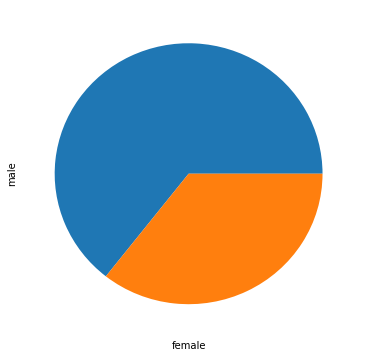

In [5]:
fig = plt.figure(figsize=(6,6))
plt.pie(data.sex.value_counts())
plt.xlabel('female')
plt.ylabel('male')

2) Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

Text(0,0.5,'Fare')

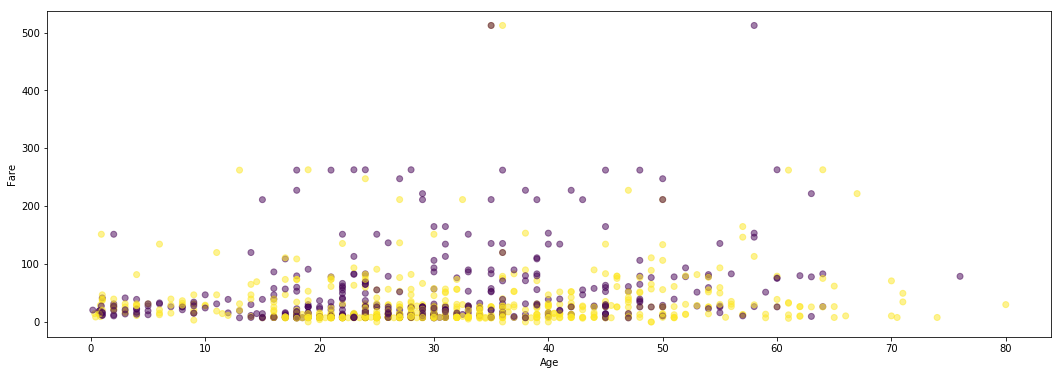

In [6]:
fig = plt.figure(figsize=(18,6))
plt.scatter(data['age'], data['fare'], alpha=0.5, c=pd.factorize(data['sex'])[0])
plt.xlabel('Age')
plt.ylabel('Fare')

## Task2

It happens all the time: someone gives you data containing malformed strings, Python, lists and               missing data. How do you tidy it up so you can get on with the analysis? 
Take this monstrosity as the DataFrame to use in the following puzzles: 
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm',      'Budapest_PaRis', 'Brussels_londOn'],  
'FlightNumber': [10045, np.nan, 10065, np.nan, 10085], 
 'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],  
'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )',  '12. Air France', '"Swiss Air"']})

In [8]:
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm', 'Budapest_PaRis', 'Brussels_londOn'], 'FlightNumber': [10045, np.nan, 10065, np.nan, 10085], 'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]], 'Airline': ['KLM(!)', ' (12)', '(British Airways. )', '12. Air France', '"Swiss Air"']})

In [9]:
df

,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045.0,"[23, 47]",KLM(!)
1,MAdrid_miLAN,NaN,[],(12)
2,londON_StockhOlm,10065.0,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,NaN,[13],12. Air France
4,Brussels_londOn,10085.0,"[67, 32]","""Swiss Air"""


1)  Some values in the the FlightNumber column are missing. These numbers are meant to               increase by 10 with each row so 10055 and 10075 need to be put in place. Fill in these missing                    numbers and make the column an integer column (instead of a float column).

In [10]:
df['FlightNumber'] = df['FlightNumber'].interpolate().astype(int)
df.FlightNumber

0    10045
1    10055
2    10065
3    10075
4    10085
Name: FlightNumber, dtype: int32

2) The From_To column would be better as two separate columns! Split each string on the                underscore delimiter _ to give a new temporary DataFrame with the correct values. Assign the               correct column names to this temporary DataFrame. 

In [11]:
df['From'] = df['From_To'].str.split('_').str[0]
df['To'] = df['From_To'].str.split('_').str[1]

In [13]:
df

,From_To,FlightNumber,RecentDelays,Airline,From,To
0,LoNDon_paris,10045,"[23, 47]",KLM(!),LoNDon,paris
1,MAdrid_miLAN,10055,[],(12),MAdrid,miLAN
2,londON_StockhOlm,10065,"[24, 43, 87]",(British Airways. ),londON,StockhOlm
3,Budapest_PaRis,10075,[13],12. Air France,Budapest,PaRis
4,Brussels_londOn,10085,"[67, 32]","""Swiss Air""",Brussels,londOn


3) Notice how the capitalisation of the city names is all mixed up in this temporary DataFrame.                 Standardise the strings so that only the first letter is uppercase (e.g. "londON" should become               "London".) 

In [14]:
df.From_To.str.capitalize()

0        London_paris
1        Madrid_milan
2    London_stockholm
3      Budapest_paris
4     Brussels_london
Name: From_To, dtype: object

4) Delete the From_To column from df and attach the temporary DataFrame from the previous               questions. 

In [15]:
df

,From_To,FlightNumber,RecentDelays,Airline,From,To
0,LoNDon_paris,10045,"[23, 47]",KLM(!),LoNDon,paris
1,MAdrid_miLAN,10055,[],(12),MAdrid,miLAN
2,londON_StockhOlm,10065,"[24, 43, 87]",(British Airways. ),londON,StockhOlm
3,Budapest_PaRis,10075,[13],12. Air France,Budapest,PaRis
4,Brussels_londOn,10085,"[67, 32]","""Swiss Air""",Brussels,londOn


In [17]:
df['From_To']= df.From_To.str.capitalize()
df

,From_To,FlightNumber,RecentDelays,Airline,From,To
0,London_paris,10045,"[23, 47]",KLM(!),LoNDon,paris
1,Madrid_milan,10055,[],(12),MAdrid,miLAN
2,London_stockholm,10065,"[24, 43, 87]",(British Airways. ),londON,StockhOlm
3,Budapest_paris,10075,[13],12. Air France,Budapest,PaRis
4,Brussels_london,10085,"[67, 32]","""Swiss Air""",Brussels,londOn


5 In the RecentDelays column, the values have been entered into the DataFrame as a list. We                 would like each first value in its own column, each second value in its own column, and so on. If                    there isn't an Nth value, the value should be NaN. 
Expand the Series of lists into a DataFrame named delays, rename the columns delay_1,              delay_2, etc. and replace the unwanted RecentDelays column in df with delays.  

In [19]:
df.assign(**pd.DataFrame(df['RecentDelays'].tolist()).add_prefix('Recent_'))

,From_To,FlightNumber,RecentDelays,Airline,From,To,Recent_0,Recent_1,Recent_2
0,London_paris,10045,"[23, 47]",KLM(!),LoNDon,paris,23.0,47.0,NaN
1,Madrid_milan,10055,[],(12),MAdrid,miLAN,NaN,NaN,NaN
2,London_stockholm,10065,"[24, 43, 87]",(British Airways. ),londON,StockhOlm,24.0,43.0,87.0
3,Budapest_paris,10075,[13],12. Air France,Budapest,PaRis,13.0,NaN,NaN
4,Brussels_london,10085,"[67, 32]","""Swiss Air""",Brussels,londOn,67.0,32.0,NaN
